# Model Skill Metrics
Numerical models are ubiquitous in the ocean sciences. A good model, has good skill when compared to observations. But what is good skill? Model skill metrics can be confusing, and what they actaully mean is not always clear. Here we will generate a fake model and some fake data to explore what "good" model skill might look like. For this activity we will pretend that we measured water-level and developed a model to predict those water levels. Our units will be in meters (m)

In [1]:
# Importing standard packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import seaborn as sns
sns.set()

Text(0.5, 0, 'Time [hours]')

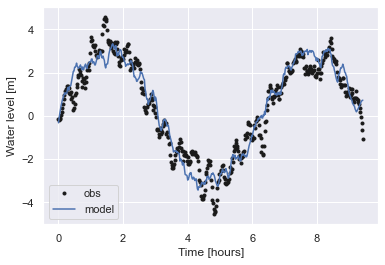

In [2]:
# Let's start by generating a background signal with some random fluctuations
t = np.arange(0,3*np.pi,.02)
signal = 3*np.sin(t)

# Here we create a guassian distributed fluctations we can apply to model and data
fluctuations_o = 2*np.random.randn(np.shape(t)[0]) # we can add amplitude by multiplying the fluctations by a scalar
fluctuations_m = 1*np.random.randn(np.shape(t)[0])

# Smooth these fluctuations in time to make it seem more realistic
fluctuations_o = savgol_filter(fluctuations_o, 21, 3) # window size 51, polynomial order 3
fluctuations_m = savgol_filter(fluctuations_m, 21, 3) # window size 51, polynomial order 3

# Now let's generate some model and observations
obs = signal+fluctuations_o
model = signal+fluctuations_m

plt.plot(t,obs,marker='.',linestyle='none',color='k',label='obs')
plt.plot(t,model,label='model')
plt.legend()
plt.ylabel('Water level [m]')
plt.xlabel('Time [hours]')

### Scatter plots 
Scatter plots of of model predictions versus observations are commmon. Observations are typically on the x-axis, with prediction on the y-axis, with a 1-1 line showing where the two deviate


Text(0, 0.5, 'Predicted Water level [m]')

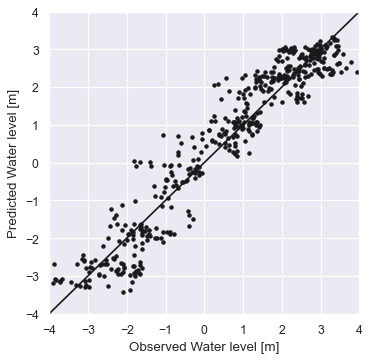

In [3]:
# Scatter plot, controlling figure size and limits
plt.figure(num=None, figsize=(5,5), dpi=80)
mylimit = [-4, 4]
plt.plot(obs,model,marker='.',linestyle='none',color='k')
plt.plot(mylimit,mylimit,linestyle='-',color='k')
plt.xlim(mylimit)
plt.ylim(mylimit)
plt.xlabel('Observed Water level [m]')
plt.ylabel('Predicted Water level [m]')


### Skill and Error metrics
Below we calculate several different error metrics, including the correlation coefficient. We print them out below. Note how some have units, and some do not. These metrics can tell you different things about how the model performs overall, and what to expect for errors for a given prediction. 

In [4]:
# This is not a complete set, but comprises commonly used metrics

# Error at each time step
diff = model - obs
# Squared Error
diff_sq = np.square(diff)

# Mean Squared Error (MSE)
mse = np.mean(diff_sq)
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
# Mean Bias
bias = np.mean(diff)

    # R-squared, Coefficient of Determination, Nash-Sutcliffe Efficiency
obs_mean = np.mean(obs)
R2 = 1 - np.sum(diff_sq)/np.sum(np.square(obs-obs_mean))

# Willmott Skill Score (WSS)
WSS = 1 - np.sum(diff_sq)/np.sum(np.square(np.abs(obs-obs_mean)+np.abs(model-obs_mean)))

# Correlation
rho = np.corrcoef(obs,model)
rho = rho[0,1]

# Print and summarize
print('MSE = {:4.3f} m^2'.format(mse))
print('RMSE = {:4.3f} m'.format(rmse))
print('Bias = {:4.3f} m'.format(bias))
print('R2 = {:4.3f}'.format(R2))
print('WSS = {:4.3f}'.format(WSS))
print('Correlation = {:4.3f}'.format(rho))
print('Correlation-squared = {:4.3f}'.format(np.square(rho)))

MSE = 0.442 m^2
RMSE = 0.665 m
Bias = 0.052 m
R2 = 0.898
WSS = 0.974
Correlation = 0.949
Correlation-squared = 0.901


Here, RMSE is often taken as the average error expected in a prediction. You can see the units of RMSE are the same as the model and observations (m)

R2, WSS, and correlation do not have units. These tell us something about how well the model performs as a whole. More specifically they tell us how well the model predicts the variance in the observed signal.

In [5]:
# Let's define a function that prints all these metrics so that you can try them with different models
def calc_skill(obs,model):
  diff = model - obs
  diff_sq = np.square(diff)
  rmse = np.mean(diff_sq)
  rmse = np.sqrt(mse)
  bias = np.mean(diff)
  obs_mean = np.mean(obs)
  R2 = 1 - np.sum(diff_sq)/np.sum(np.square(obs-obs_mean))
  WSS = 1 - np.sum(diff_sq)/np.sum(np.square(np.abs(obs-obs_mean)+np.abs(model-obs_mean)))
  rho = np.corrcoef(obs,model)
  rho = rho[0,1]
  print('MSE = {:4.3f} m^2'.format(mse))
  print('RMSE = {:4.3f} m'.format(rmse))
  print('Bias = {:4.3f} m'.format(bias))
  print('R2 = {:4.3f}'.format(R2))
  print('WSS = {:4.3f}'.format(WSS))
  print('Correlation = {:4.3f}'.format(rho))
  print('Correlation-squared = {:4.3f}'.format(np.square(rho)))

In [6]:
# You can use the function simply by calling as seen below
calc_skill(obs,model)

MSE = 0.442 m^2
RMSE = 0.665 m
Bias = 0.052 m
R2 = 0.898
WSS = 0.974
Correlation = 0.949
Correlation-squared = 0.901


### Activity 1: Is correlation always a good metric of model skill?
1. Compare the WSS, R2, and correlation skill for the two models below
2. Make scatter plots of both models and describe graphically (qualitatively) their skill

In [7]:
# Create two models
fluctuations_o = 2*np.random.randn(np.shape(t)[0]) # we can add amplitude by multiplying the fluctations by a scalar
fluctuations_m = 1*np.random.randn(np.shape(t)[0])
fluctuations_o = savgol_filter(fluctuations_o, 21, 3) # window size 51, polynomial order 3
fluctuations_m = savgol_filter(fluctuations_m, 21, 3) # window size 51, polynomial order 3
obs = signal+fluctuations_o
# Model 1
model_1 = signal+fluctuations_m
# Model 2
model_2 = 0.5*signal+fluctuations_m

In [8]:
# Step 1: Use calc_skill to calcuate model skill for both models




In [9]:
# Step 2: Plot scatter plots for both models




### Activity 2: What's a good R2?
In hydrology an R2 > 0.6 is often taken as cut-off for a good model. But what does look like?
1. What does R2 = 0.9 and R2 = 0.6 look like? Adjust the amplitude of fluctuations_m to create a model with R2=0.9 and R2=0.6
2. Plot time series of both predictions to see how different they look, Do you have a feeling now for how good hydrology model might actually look? Are you surprised by the level of error?

MSE = 0.442 m^2
RMSE = 0.665 m
Bias = 0.336 m
R2 = 0.799
WSS = 0.948
Correlation = 0.913
Correlation-squared = 0.833


Text(0.5, 0, 'Time [hours]')

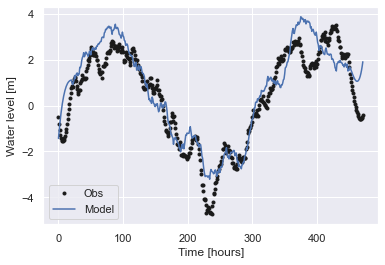

In [10]:
# Step 1
# Set the amplitude of the model fluctuations (noise)
amplitude = 1.1

# Create fluctuations
fluctuations_o = 3*np.random.randn(np.shape(t)[0]) 
fluctuations_m = 2*np.random.randn(np.shape(t)[0]) # <--- Adjust the scalar value here
# Smooth fluctuations
fluctuations_o = savgol_filter(fluctuations_o, 41, 3) # window size 51, polynomial order 3
fluctuations_m = savgol_filter(fluctuations_m, 41, 3) # window size 51, polynomial order 3
# Create obs/models
obs = signal+fluctuations_o
model = signal+amplitude*fluctuations_m

# Calc skill
calc_skill(obs,model) 

# Basic plot
plt.plot(obs,marker='.',label='Obs',linestyle='none',color='k')
plt.plot(model,label='Model')
plt.legend()
plt.ylabel('Water level [m]')
plt.xlabel('Time [hours]')

In [11]:
# Plot both time series here, for R2 = 0.9 and R2 = 0.6


